# Features Engineering : feature creation for Data 

## 1. Read in text

In [3]:
import pandas as pd

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [4]:
#creating feature for our data

data['body_len'] = data['body_text'].apply(lambda x: len(x)- x.count(" "))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


In [6]:
#creating feature for % of text is punctuation 
import string 

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punch%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punch%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


In [9]:
#Evaluate created feature

from matplotlib import pyplot
import numpy as np
%matplotlib inline

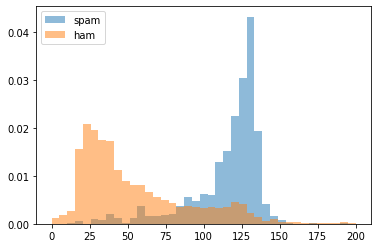

In [16]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label'] == 'spam']['body_len'], bins, density=True, alpha=0.5,   label='spam')
pyplot.hist(data[data['label'] == 'ham']['body_len'], bins, density=True, alpha=0.5,  label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

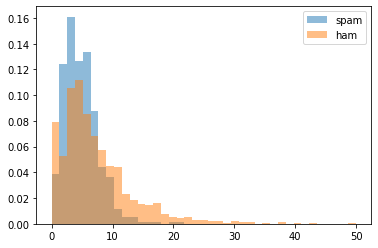

In [22]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label'] == 'spam']['punch%'], bins, density=True, alpha=0.5,   label='spam')
pyplot.hist(data[data['label'] == 'ham']['punch%'], bins, density=True, alpha=0.5,  label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

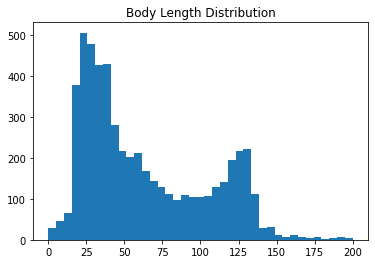

In [23]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()

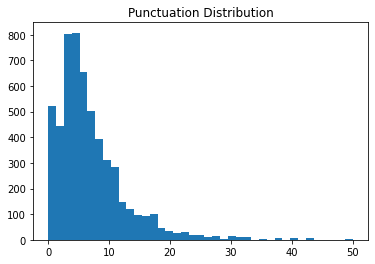

In [25]:
bins = np.linspace(0, 50, 40)
pyplot.hist(data['punch%'], bins)
pyplot.title('Punctuation Distribution')
pyplot.show()

## Applying box-Cox Power transformation 

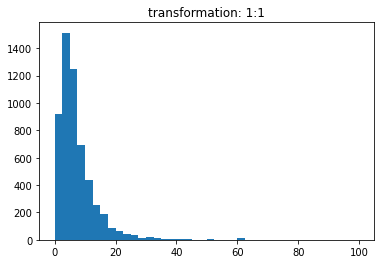

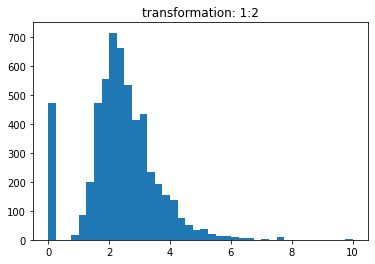

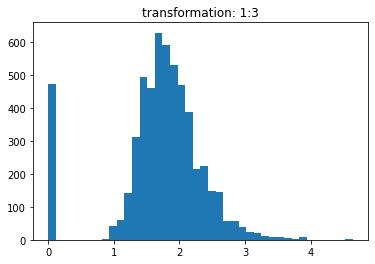

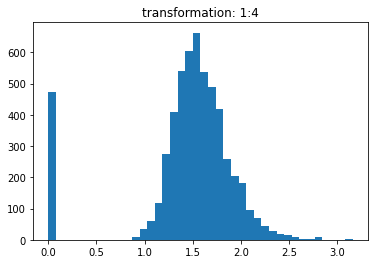

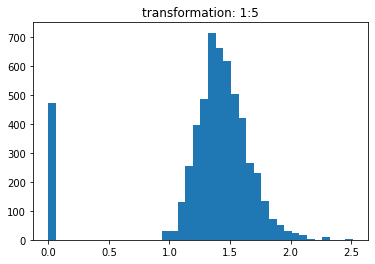

In [26]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punch%'])**(1/i), bins=40)
    pyplot.title("transformation: 1:{}".format(str(i)))
    pyplot.show()